# Feature Engineering , Modelling

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import Ridge, RidgeCV, Lasso,LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

from sklearn.utils import resample

# for warnings 
import warnings
warnings.filterwarnings('ignore')

## Importing the processed data into dataframe

In [2]:
final_data= pd.read_csv('Processed_data.csv',delimiter=',')
final_data

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


# Simple OLS (Least squares Method)

In [3]:
x=final_data.iloc[:,0:7]
y=final_data.iloc[:,8]

x1 = sm.add_constant(x)
result=sm.OLS(y,x1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CompressiveStrength   R-squared:                       0.456
Model:                             OLS   Adj. R-squared:                  0.452
Method:                  Least Squares   F-statistic:                     122.5
Date:                 Thu, 28 Dec 2023   Prob (F-statistic):          1.62e-130
Time:                         18:52:20   Log-Likelihood:                -4047.5
No. Observations:                 1030   AIC:                             8111.
Df Residuals:                     1022   BIC:                             8150.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.6290     26.834      0.508      0.612     -39.026      66.284
Cement               0.1058      0.009     11.996      0.000       0.088       0.123
BlastFurnaceSlag     0.0759      0.010      7.245      0.000       0.055       0.097
FlyAsh               0.0477      0.013      3.666      0.000       0.022       0.073
Water               -0.1197      0.043     -2.761      0.006      -0.205      -0.035
Superplasticizer     0.4342      0.123      3.534      0.000       0.193       0.675
CoarseAggregate      0.0056      0.009      0.598      0.550      -0.013       0.024
FineAggregate       -0.0026      0.011     -0.239      0.811      -0.024       0.019
==============================================================================
Omnibus:                       13.271   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.335
Skew:                           0.012   Prob(JB):                       0.0155
Kurtosis:                       2.560   Cond. No.                     9.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Observation

- OLS regression is simple and common method used to find relationship between a dependent variable and many independent variable.
- This method aims to minimise the sum of square od the residuals to find best fitted line
- The R-squared value indiacates the amount of variablility explained by the model. In this case its around 45.6% which is quite low.
- Slightly lower than r-squared , adjusted for the number of predictors. In this case its around 45.2%
- F- statistic indicates the significance of the model. In this case, its high which implies that the model is significant.
- AIC, BIC is higher for this due to variablitity of data, which might contradict the previous sentence suggesting the model may be insignificant.
- Ombinus test suggest the  skewness and kurtosis of the residuals. In this case, 13.71 is not close to zero indicating might be not normally distributed
- Skewness of the model is 0.012 which is quite close to zero. This usggest that the residuals are fairly symmetric.
- Kurtosis ('Tailedness') of the residuals seems to be 2.560 which is less than 3 ,indicates that the distribution is platykurtic in nature. This means that the tails are lighter than the normal distribution, implying fewer outliers.
- Dublin-Watson test indicates the statistc for autocorelation of residuals. Values near to zero indicate positive correlation, and values near to 4 indicate negative correaltion. In this model, the value is around 1.239 suggesting slightly positive corelation amongst residuals.
- Jarque-Bera test is test of normality of residuals. A large JB test  value compared to the degree of freedom indicates that the residuals are not normally distributed. in this case its around 8.335 , which indicates non-normality of residuals.


From the above explanation it is necessary to do feature engineering using decision tree. I have choosen decision tree as it doesn't tend to overfit the model based on the number of variables as found in random forest.

## Feature Engineering using Decision Tree

Scaling the Model

In [4]:
final_data_z = final_data.apply(zscore)
final_data_z=pd.DataFrame(final_data_z,columns=final_data_z.columns)

Here, all the attributes in the same scale(unit) except the age attribute. Hence, we are scaling the attributes. We are using zscore for scaling.

Splitting the data into independent and dependent attributes



In [5]:
X=final_data_z.iloc[:,0:8]
y = final_data_z.iloc[:,8]

Train test split is sklearn object where it splits the data without any bias , and shuffles it.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1,shuffle=True)

### Decision Tree- Model Fitting

In [7]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor()

Let us now print the feature importance of all the predictor variables.

In [8]:
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                        Imp
Cement            0.308616
BlastFurnaceSlag  0.059058
FlyAsh            0.008240
Water             0.122817
Superplasticizer  0.052607
CoarseAggregate   0.025965
FineAggregate     0.049864
Age               0.372833


From the decision tree regressor, we found out the most important features which can explain the dynamics of the Compressive strength are
 - Age
 - Cement in kg for m^3 of mixture 
 - Water in kg for m^3 of mixture
This confirms the EDA results except in case of coarse aggregate.

Further analysis needs to be done for the followin features.

In [9]:
def model_performance(X_train, X_test, y_train, y_test, model):
    try:   
        # Fitting the model
        model.fit(X_train, y_train)
        
        # Predicting on test data
        y_pred = model.predict(X_test)
        
        # Calculating the metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # For linear models, calculating p-value and t-statistic
        if isinstance(model, LinearRegression):
            X_train_sm = sm.add_constant(X_train)  # adding a constant
            model_sm = sm.OLS(y_train, X_train_sm).fit()
            p_values = model_sm.pvalues
            t_stats = model_sm.tvalues
            return mse, rmse, r2, p_values, t_stats
        else:
            # For non-linear models like Random Forest, we return None for p-value and t-statistic
            return mse, rmse, r2, None, None

    
    except Exception as e:
        print(f"An error occurred: {e}")

In [10]:

metrics_dt= model_performance(X_train, X_test, y_train, y_test,dt_model)
metrics_dt

(0.2159331760409755, 0.4646861048503339, 0.7703077119190066, None, None)

The error rate for test data set is as shown above.
- The R2 score explains around 78.71% of variance in the data with rmse of 0.4430 
- The model might be overfitting  which can be checked by comparing the values of train data with the test data.

To check the reliability of the model we will use train test r2 score.

In [11]:
r2_train_dt=dt_model.score(X_train,y_train)
r2_test_dt=metrics_dt[2]
print('R2 score on Training data using Decision tree:',r2_train_dt)
print('R2 Score on Test data using Decision Tree:',r2_test_dt)

R2 score on Training data using Decision tree: 0.9938748100766917
R2 Score on Test data using Decision Tree: 0.7703077119190066


Therefore the model must be overfitting due to variablity in data since it is predicting around 99% accurately in train data and accuray drops to 78%

Using the feature importance of the decision tree model we can further analyse dynamics using other Ensemble Learning.

In [12]:
model_dt_1=DecisionTreeRegressor()

data_dt=final_data_z.copy()

X_dt= data_dt.drop(['FlyAsh','CoarseAggregate','FineAggregate','CompressiveStrength'],axis=1)
y_dt = data_dt.iloc[:,8]

X_train_dt,X_test_dt,y_train_dt,y_test_dt= train_test_split(X_dt,y_dt, test_size = 0.3, random_state = 1,shuffle=True)

model_dt_1.fit(X_train_dt , y_train_dt)


DecisionTreeRegressor()

In [13]:
metrics_dt_final=model_performance(X_train_dt,X_test_dt,y_train_dt,y_test_dt,model_dt_1)

In [14]:
metrics_dt_final

(0.2050143263827501, 0.45278507747357366, 0.7819223030957428, None, None)

In [15]:
print('Feature importances: \n',pd.DataFrame(model_dt_1.feature_importances_,columns=['Imp'],index=X_train_dt.columns))

Feature importances: 
                        Imp
Cement            0.348969
BlastFurnaceSlag  0.073836
Water             0.139069
Superplasticizer  0.061187
Age               0.376937


In [16]:
r2_train_dt_final=model_dt_1.score(X_train_dt,y_train_dt)
r2_test_dt_final=metrics_dt_final[2]
print('R2 score on Training data using Decision tree:',r2_train_dt_final)
print('R2 Score on Test data using Decision Tree:',r2_test_dt_final)

R2 score on Training data using Decision tree: 0.9919795459520203
R2 Score on Test data using Decision Tree: 0.7819223030957428


The model here as well is overfitting , Lets now cnduct k-fold Cross validation for the decision tree model

In [17]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results1 = cross_val_score(model_dt_1,X_dt, y_dt, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8629040522812886
Standard Deviation:  0.04360048506724582


The accuracy of k-folds decision tree for the feature selected increased from 79.82 to 85.4465.

## Random Forest 

Using the same approach used in decision tree lets do the random forest for selected features.

In [18]:
model_rf= RandomForestRegressor()

We can use the same features for training the Random forest model as well

In [19]:
model_rf.fit(X_train_dt,y_train_dt)


RandomForestRegressor()

In [20]:
metrics_rf=model_performance(X_train_dt,X_test_dt,y_train_dt,y_test_dt,model_rf)
metrics_rf

(0.11852955988256907, 0.3442812220882357, 0.8739178188649708, None, None)

In [21]:
r2_train_rf=model_rf.score(X_train_dt,y_train_dt)
r2_test_rf=metrics_rf[2]
print('R2 score on Training data using Random Forest:',r2_train_rf)
print('R2 Score on Test data using Random Forest:',r2_test_rf)

R2 score on Training data using Random Forest: 0.9804415598895991
R2 Score on Test data using Random Forest: 0.8739178188649708


The model seems to be slightly overfitting as accuracy of train data is more than test data

## Random forest - k fold Cross validation

In [22]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results2 = cross_val_score(model_rf,X_dt, y_dt, cv=kfold)
accuracy_rf=np.mean(abs(results2))
print('Average accuracy: ',accuracy_rf)
print('Standard Deviation: ',results2.std())

Average accuracy:  0.9066385097169971
Standard Deviation:  0.03439407770340155


The accuracy of k-folds random forest for the feature selected increased from 87.90 to 90.695.

Since there is alot of noise in the models selected above, this has resulted in more overfitting the model. In order to reduce the noise at each node of the tree or at each tree gradient boosting can be a special technique where it prunes the tree based on analysing each of tree errors. This can help o capture more complex pattern in the data as well.

## Gradient  Boosting Regressor

In [23]:
model_gbr= GradientBoostingRegressor()

We can use the same features for training the Gradient Boosting regressor model as well

In [24]:
model_gbr.fit(X_train_dt,y_train_dt)

GradientBoostingRegressor()

In [25]:
metrics_gbr=model_performance(X_train_dt,X_test_dt,y_train_dt,y_test_dt,model_gbr)
metrics_gbr

(0.11818224911195449, 0.3437764522359763, 0.8742872600367271, None, None)

In [26]:
r2_train_gbr=model_gbr.score(X_train_dt,y_train_dt)
r2_test_gbr=metrics_gbr[2]
print('R2 score on Training data using Random Forest:',r2_train_gbr)
print('R2 Score on Test data using Random Forest:',r2_test_gbr)

R2 score on Training data using Random Forest: 0.9367871391362556
R2 Score on Test data using Random Forest: 0.8742872600367271


Although there is a chance of overfitting the data it seems to predict has impoved from the previous models.

In [27]:
num_folds = 18
seed = 95
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results3 = cross_val_score(model_gbr,X_dt, y_dt, cv=kfold)
accuracy3=np.mean(abs(results3))
print('Average accuracy: ',accuracy3)
print('Standard Deviation: ',results3.std())

Average accuracy:  0.8922119825965596
Standard Deviation:  0.02832003114767999


The accuracy of k-folds random forest for the feature selected increased from 87.44 to 89.207.

As there is a still chance of overfitting , we can use neural network model to check the variability and complexity of the data.

## Neural Network - MLP Regressor

I choose MLP (Multi-layer Perceptron) Regressor, as it can be utlised to check the complexity of the model,that can regularise the date using L1,L2 techniques , results in early stopping of overfitting.MLP can scale well with large datasets with high-dimensionality. It is also flexible as you can specify the number of hidden layers as well as specifiy neurons in each layer.

In [28]:
from sklearn.neural_network import MLPRegressor

In [29]:
model_mlp =  MLPRegressor(hidden_layer_sizes=(512,256,128,64), max_iter=1000, random_state=2, n_iter_no_change=20 ,validation_fraction=0.2, batch_size=64, verbose=True, activation='relu')
model_mlp.fit(X_train,y_train)

Iteration 1, loss = 0.28612043
Iteration 2, loss = 0.12548635
Iteration 3, loss = 0.08126062
Iteration 4, loss = 0.06563560
Iteration 5, loss = 0.05343751
Iteration 6, loss = 0.05023000
Iteration 7, loss = 0.04811364
Iteration 8, loss = 0.04819986
Iteration 9, loss = 0.04262424
Iteration 10, loss = 0.03838957
Iteration 11, loss = 0.03513577
Iteration 12, loss = 0.03407991
Iteration 13, loss = 0.03267124
Iteration 14, loss = 0.02944192
Iteration 15, loss = 0.02861772
Iteration 16, loss = 0.02762309
Iteration 17, loss = 0.02638807
Iteration 18, loss = 0.02466585
Iteration 19, loss = 0.02395904
Iteration 20, loss = 0.02421606
Iteration 21, loss = 0.02401702
Iteration 22, loss = 0.02500842
Iteration 23, loss = 0.02237475
Iteration 24, loss = 0.02223935
Iteration 25, loss = 0.02470641
Iteration 26, loss = 0.02160999
Iteration 27, loss = 0.02186928
Iteration 28, loss = 0.02221456
Iteration 29, loss = 0.02120371
Iteration 30, loss = 0.01990535
Iteration 31, loss = 0.02298671
Iteration 32, los

MLPRegressor(batch_size=64, hidden_layer_sizes=(512, 256, 128, 64),
             max_iter=1000, n_iter_no_change=20, random_state=2,
             validation_fraction=0.2, verbose=True)

In [30]:
metrics_mlp=model_performance(X_train, X_test, y_train, y_test,model_mlp)
metrics_mlp

Iteration 1, loss = 0.28612043
Iteration 2, loss = 0.12548635
Iteration 3, loss = 0.08126062
Iteration 4, loss = 0.06563560
Iteration 5, loss = 0.05343751
Iteration 6, loss = 0.05023000
Iteration 7, loss = 0.04811364
Iteration 8, loss = 0.04819986
Iteration 9, loss = 0.04262424
Iteration 10, loss = 0.03838957
Iteration 11, loss = 0.03513577
Iteration 12, loss = 0.03407991
Iteration 13, loss = 0.03267124
Iteration 14, loss = 0.02944192
Iteration 15, loss = 0.02861772
Iteration 16, loss = 0.02762309
Iteration 17, loss = 0.02638807
Iteration 18, loss = 0.02466585
Iteration 19, loss = 0.02395904
Iteration 20, loss = 0.02421606
Iteration 21, loss = 0.02401702
Iteration 22, loss = 0.02500842
Iteration 23, loss = 0.02237475
Iteration 24, loss = 0.02223935
Iteration 25, loss = 0.02470641
Iteration 26, loss = 0.02160999
Iteration 27, loss = 0.02186928
Iteration 28, loss = 0.02221456
Iteration 29, loss = 0.02120371
Iteration 30, loss = 0.01990535
Iteration 31, loss = 0.02298671
Iteration 32, los

(0.1102412491441393, 0.3320259766104744, 0.8827342550085069, None, None)

In [31]:
r2_train_mlp=model_mlp.score(X_train,y_train)
r2_test_mlp=metrics_mlp[2]
print('R2 score on Training data using Random Forest:',r2_train_mlp)
print('R2 Score on Test data using Random Forest:',r2_test_mlp)

R2 score on Training data using Random Forest: 0.9854534382549154
R2 Score on Test data using Random Forest: 0.8827342550085069


This model also seems to be overfitting because the dimensionality of data seems to be less 

Based on the above models, the random forest regressor, random forest with k folds, Gradient Boosting regressor, Gradient Boosting regressor with k folds seems to performing well. Lets perform hyperparamter tuning for both these models.

In [32]:
from sklearn.model_selection import RandomizedSearchCV  
#In random forest we are not used grid search CV because of memory reason.

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['auto', 'sqrt'] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,8] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4]  #Min number of data point allowed in leaf node

# Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Object creation
rf_clf = RandomForestRegressor(random_state=42) #Provide random state because select rows and columns randomly

# Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='r2',param_distributions=random_grid,
                           n_iter=10,cv=2,verbose=2,random_state=1,n_jobs=-1)

# Fitting the training data
rf_cv.fit(X_train_dt,y_train_dt)

# Get best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")

Fitting 2 folds for each of 10 candidates, totalling 20 fits


Best parameter: {'n_estimators': 1155, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 91}


In [33]:
model_rf1= RandomForestRegressor(**rf_best_params)
model_rf1.fit(X_train_dt,y_train_dt)


RandomForestRegressor(max_depth=91, max_features='auto', min_samples_split=3,
                      n_estimators=1155)

In [34]:
metrics_rf2=model_performance(X_train_dt,X_test_dt,y_train_dt,y_test_dt,model_rf1)

In [35]:
r2_train_rf2=model_rf1.score(X_train_dt,y_train_dt)
r2_test_rf2=metrics_rf2[2]
print('R2 score on Training data using Random Forest:',r2_train_rf2)
print('R2 Score on Test data using Random Forest:',r2_test_rf2)

R2 score on Training data using Random Forest: 0.977984539188512
R2 Score on Test data using Random Forest: 0.8734074620824372


After hyper parameter tuning of the Random forest, the accuracy of train and test aren't increasing and remaining the same.

Therefore we would go ahead with interpretation of random forest regressor with confidence interval with bootstrap sampling technique

In [36]:
concrete_agg=X.join(y)

In [37]:
values = concrete_agg.values

n_iterations = 1000

n_size = int(len(final_data_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  
    
    
     # fit model
    rfTree = RandomForestRegressor(max_depth=91, max_features='auto', min_samples_split=3,n_estimators=100)
    
    rfTree.fit(train[:,:-1], train[:,-1]) 
    

    y_test = test[:,-1]    
    
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

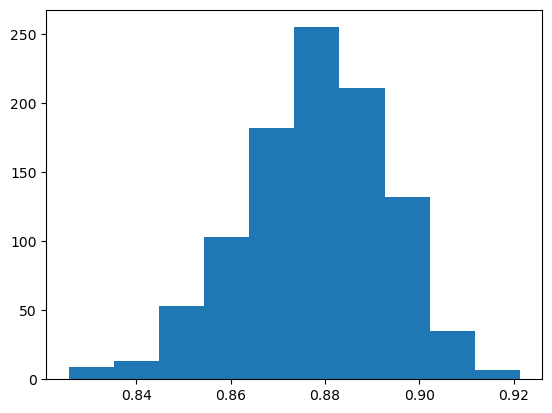

95.0 confidence interval 84.5% and 90.5%


In [38]:
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

Therefore the confidence interval of th random forest regressor is around 84.5% to 90.9% , this can be used as our primary model. 